<a href="https://colab.research.google.com/github/Kitanaluv/NYC-Collision-Dashboard/blob/main/Car_image_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advancing Highway Surveillance with CNN-based Vehicle Recognition


The transportation department's current highway surveillance system faces challenges in effectively managing traffic and responding to incidents. Manual monitoring methods are slow and prone to errors, making it difficult for the department to ensure highway safety and keep traffic flowing smoothly.

To address these challenges, the transportation department aims to build a CNN-based vehicle recognition systems. The objective is to automate the detection and classification of vehicles on highways, enabling real-time monitoring of traffic conditions and swift response to incidents. By adopting advanced technology, the department seeks to enhance highway surveillance capabilities, improve traffic management, and enhance overall road safety.

Extracting our data with 4165 car images of 7 classes.

In [ ]:
!unzip "/content/archive (9).zip"

In [ ]:
from PIL import Image
import os

def get_image_size(image_path):
    try:
        # Open the image file
        with Image.open(image_path) as img:
            # Get the size of the image
            width, height = img.size
            return width, height
    except Exception as e:
        print(f"Error: {e}")
        return None

# Example usageinflating: Cars Dataset/train/Toyota Innova/91.jpg
image_path = "Cars Dataset/train/Toyota Innova/91.jpg"
if os.path.exists(image_path):
    width, height = get_image_size(image_path)
    if width and height:
        print(f"Image size: {width}x{height} pixels")
else:
    print("Image file not found.")


Image size: 259x194 pixels


We are handling Data Preprocessing as we load the data,we are going to resize all the images to 128*128 before feeding them into the neural network.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define directories for training and testing data
train_dir = '/content/Cars Dataset/train'
test_dir = '/content/Cars Dataset/test'

# Image preprocessing and augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Image preprocessing for testing data (no augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create separate generators for training and testing data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  # Resize images to 224x224 pixels
    class_mode='categorical'  # Assumes you have multiple classes
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),  # Resize images to 128x128 pixels
    class_mode='categorical'  # Assumes you have multiple classes
)


Found 3352 images belonging to 7 classes.
Found 813 images belonging to 7 classes.


In [ ]:
# Print information about the training dataset
print("Training dataset:")
print("Number of images:", train_generator.samples)
print("Number of batches per epoch:", len(train_generator))
print("Batch size:", train_generator.batch_size)
print("Class indices:", train_generator.class_indices)
print()

# Print information about the test dataset
print("Test dataset:")
print("Number of images:", test_generator.samples)
print("Number of batches:", len(test_generator))
print("Batch size:", test_generator.batch_size)
print("Class indices:", test_generator.class_indices)


Training dataset:
Number of images: 3352
Number of batches per epoch: 105
Batch size: 32
Class indices: {'Audi': 0, 'Hyundai Creta': 1, 'Mahindra Scorpio': 2, 'Rolls Royce': 3, 'Swift': 4, 'Tata Safari': 5, 'Toyota Innova': 6}

Test dataset:
Number of images: 813
Number of batches: 26
Batch size: 32
Class indices: {'Audi': 0, 'Hyundai Creta': 1, 'Mahindra Scorpio': 2, 'Rolls Royce': 3, 'Swift': 4, 'Tata Safari': 5, 'Toyota Innova': 6}


Now let's take a look at a few pictures of the cars.

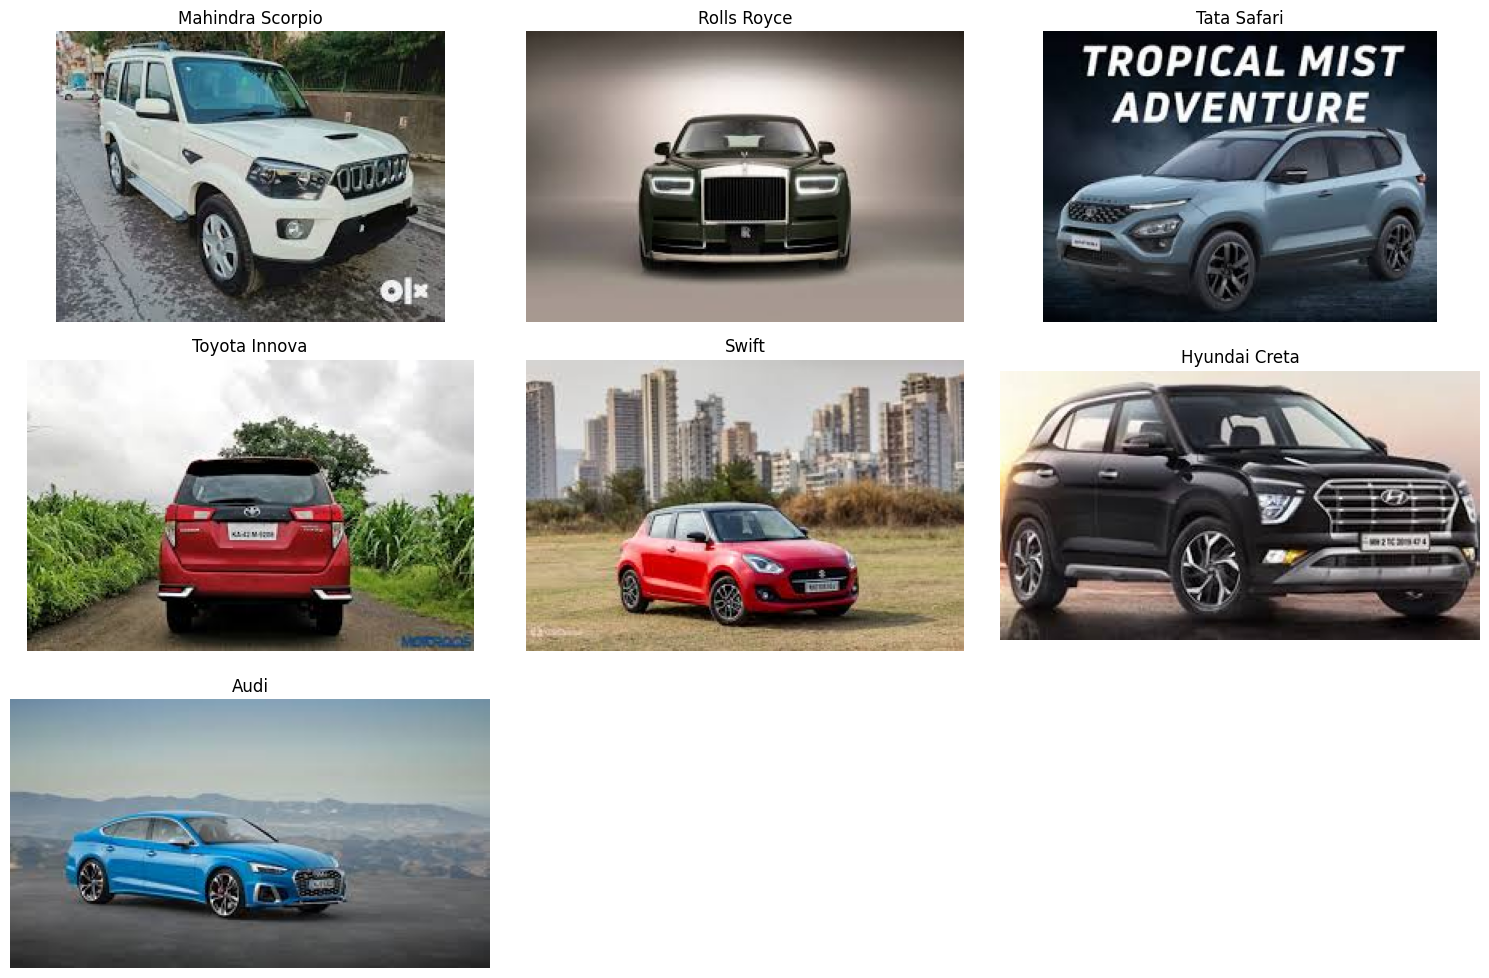

In [ ]:
import os
import matplotlib.pyplot as plt

# Define the directories
test_dir = '/content/Cars Dataset/test'

# Get the class names
class_names = os.listdir(test_dir)

# Create a subplot grid
num_classes = len(class_names)
plt.figure(figsize=(15, 10))
columns = 3
rows = (num_classes // columns) + (num_classes % columns)

# Plot one image for each class
for i, class_name in enumerate(class_names, 1):
    class_dir = os.path.join(test_dir, class_name)
    img_file = next(os.path.join(class_dir, fname) for fname in os.listdir(class_dir) if fname.endswith('.jpg'))
    img = plt.imread(img_file)

    plt.subplot(rows, columns, i)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')

plt.tight_layout()
plt.show()


## Building a CNN model

The images that will go into our network are 128x128 color images.

We will stack 3 {convolution + relu + maxpooling} modules. Our convolutions operate on 3x3 windows and our maxpooling layers operate on 2x2 windows. Our first convolution extracts 32 filters, the following one extracts 64 filters, and the last one extracts 128 filters.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
# Define the input shape of your images
input_shape = (128, 128, 3)

# Initialize a sequential model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))



In [ ]:
# Flatten the output of the convolutional layers
model.add(Flatten())

# Add fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))  # Add dropout for regularization

model.add(Dense(256, activation='relu'))

# Output layer
model.add(Dense(7, activation='softmax'))


In [ ]:
from tensorflow.keras.losses import CategoricalCrossentropy

# Compile the model
model.compile(optimizer='adam',
              loss=CategoricalCrossentropy(),
              metrics=['accuracy'])


Model Summarization

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 128)      

In [ ]:
# Specify the number of epochs
epochs = 30

# Fit the model to the training data
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator
)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/30
105/105 [==============================] - 145s 1s/step - loss: 1.8473 - accuracy: 0.2825 - val_loss: 1.7500 - val_accuracy: 0.3665
Epoch 2/30
105/105 [==============================] - 145s 1s/step - loss: 1.7348 - accuracy: 0.3473 - val_loss: 1.8465 - val_accuracy: 0.2964
Epoch 3/30
105/105 [==============================] - 143s 1s/step - loss: 1.6921 - accuracy: 0.3729 - val_loss: 1.5547 - val_accuracy: 0.4649
Epoch 4/30
105/105 [==============================] - 142s 1s/step - loss: 1.5904 - accuracy: 0.4018 - val_loss: 1.4038 - val_accuracy: 0.4686
Epoch 5/30
105/105 [==============================] - 141s 1s/step - loss: 1.5099 - accuracy: 0.4466 - val_loss: 1.3733 - val_accuracy: 0.4834
Epoch 6/30
105/105 [==============================] - 143s 1s/step - loss: 1.4551 - accuracy: 0.4678 - val_loss: 1.5140 - val_accuracy: 0.4613
Epoch 7/30
105/105 [==============================] - 143s 1s/step - loss: 1.4131 - accuracy: 0.4911 - val_loss: 1.2538 - val_accuracy: 0.5363

### Evaluating Accuracy and Loss of the Model

Plotting the training/validation accuracy and loss as collected during training:

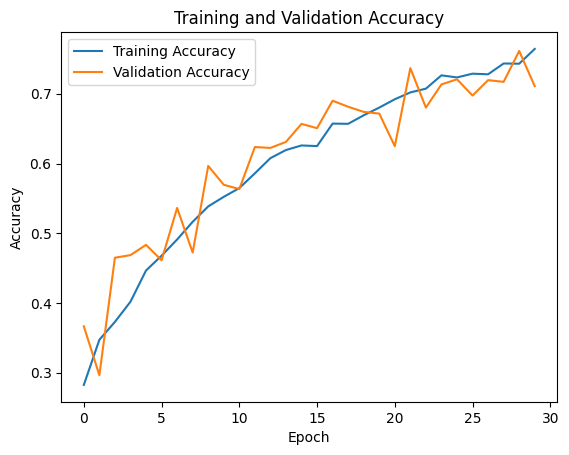

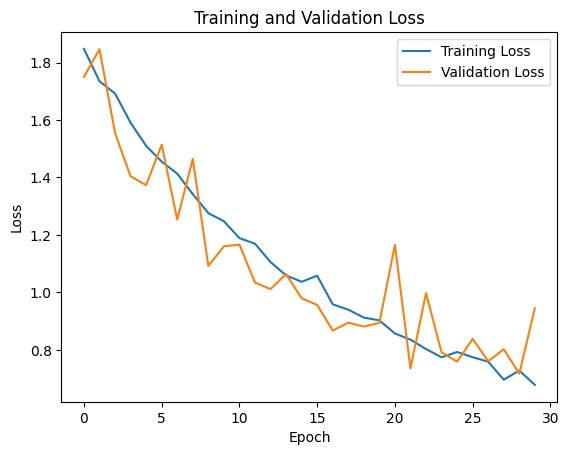

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
